# Chapter 04

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

## Data Generation

In [2]:
df = pd.DataFrame({
    'Score': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 12, 21, 34, 49, 51, 62, 78, 82, 99, 98],
    'Grade': ['F', 'F', 'F', 'F', 'B', 'B', 'B', 'A', 'A', 'A', 'F', 'F', 'F', 'F', 'B', 'B', 'B', 'A', 'A', 'A'],
})
df

,Score,Grade
0,10,F
1,20,F
2,30,F
3,40,F
4,50,B
5,60,B
6,70,B
7,80,A
8,90,A
9,100,A


In [3]:
df = df.sort_values(by=['Score'], ignore_index=True)
df

,Score,Grade
0,10,F
1,12,F
2,20,F
3,21,F
4,30,F
5,34,F
6,40,F
7,49,F
8,50,B
9,51,B


## Data Preprocessing: LabelEncoder for classification

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Grade_encoded'] = le.fit_transform(df['Grade'])
df

,Score,Grade,Grade_encoded
0,10,F,2
1,12,F,2
2,20,F,2
3,21,F,2
4,30,F,2
5,34,F,2
6,40,F,2
7,49,F,2
8,50,B,1
9,51,B,1


## Splitting data

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Score']], df['Grade_encoded'], test_size=0.2)  # whenever you run, generate differently

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16, 1) (4, 1) (16,) (4,)


In [6]:
X_test

,Score
16,90
7,49
19,100
17,98


In [7]:
y_test

16    0
7     2
19    0
17    0
Name: Grade_encoded, dtype: int32

## Logistic Regression

### Checking classification probability using `predict_proba()`

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

print(np.round(model.predict_proba(X_test), 2))

[[1.   0.   0.  ]
 [0.   0.93 0.07]
 [1.   0.   0.  ]
 [1.   0.   0.  ]]


### Training and Testing

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("My prediction", y_pred)
print("Actual values", y_test.values)  # used .values to convert Series to numpy.ndarray
print("Accuracy", model.score(X_test, y_test))  # 'score' function of LogisticRegression returns the accuracy

My prediction [0 1 0 0]
Actual values [0 2 0 0]
Accuracy 0.75


### Cross validation using `cross_val_score()`
- `cross_val_score()`: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
- For scoring parameters: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
scores = cross_val_score(model, X_train, y_train, cv=3)  # cv means cross validation, here it is Stratified 3-Fold

print(scores)

[1.  0.8 0.8]


In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')  # scoring can be specified

print(scores)

[1.  0.8 0.8]


### Evaluating using `Confusion Matrix`

In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test.values, y_pred)

array([[3, 0, 0],
       [0, 0, 0],
       [0, 1, 0]], dtype=int64)

## Classification Practice (using LogisticRegression)

In [13]:
df = pd.DataFrame({
    'Midterm': [None, 0, 1, 2, 2, 3, 4, 4, 4, 4, 5, 6, 8, 9, 10, 10, 11, 11, 12, 12, 13, 14, 14, 16, 17, 18, 19, 20, 20, 20],
    'Absence': [1, 8, 5, 6, 8, 2, 4, 5, None, None, None, 3, None, 1, None, 2, 2, None, None, 4, None, 1, 6, None, 1, None, None, None, 16, None],
    'Grade': ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'P', 'F', 'P', 'F', 'F', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'F', 'P', 'P', 'P', 'P', 'P', 'F', 'P'] 
})
df

,Midterm,Absence,Grade
0,NaN,1.0,F
1,0.0,8.0,F
2,1.0,5.0,F
3,2.0,6.0,F
4,2.0,8.0,F
5,3.0,2.0,F
6,4.0,4.0,F
7,4.0,5.0,F
8,4.0,NaN,P
9,4.0,NaN,F


### Handling missing values and Label Encoding

In [14]:
df = df.fillna(0)

le = LabelEncoder()
df['Grade_encoded'] = le.fit_transform(df['Grade'])
print("Encoded Label Order", le.classes_)
df

Encoded Label Order ['F' 'P']


,Midterm,Absence,Grade,Grade_encoded
0,0.0,1.0,F,0
1,0.0,8.0,F,0
2,1.0,5.0,F,0
3,2.0,6.0,F,0
4,2.0,8.0,F,0
5,3.0,2.0,F,0
6,4.0,4.0,F,0
7,4.0,5.0,F,0
8,4.0,0.0,P,1
9,4.0,0.0,F,0


### Multi-collinearity Check

In [15]:
df[['Midterm', 'Absence']].corr()

,Midterm,Absence
Midterm,1.000000,-0.140811
Absence,-0.140811,1.000000


In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

for i in range(2):
    VIF = variance_inflation_factor(df[['Midterm', 'Absence']], i)
    print(VIF)

1.21091313123076
1.21091313123076


### Splitting dataset and Feature Scaling

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(df[['Midterm', 'Absence']])
y = df['Grade_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2024) 

print(X)  # MinMaxScaler is used to normalize the features, Midterm and Absence
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

[[0.     0.0625]
 [0.     0.5   ]
 [0.05   0.3125]
 [0.1    0.375 ]
 [0.1    0.5   ]
 [0.15   0.125 ]
 [0.2    0.25  ]
 [0.2    0.3125]
 [0.2    0.    ]
 [0.2    0.    ]
 [0.25   0.    ]
 [0.3    0.1875]
 [0.4    0.    ]
 [0.45   0.0625]
 [0.5    0.    ]
 [0.5    0.125 ]
 [0.55   0.125 ]
 [0.55   0.    ]
 [0.6    0.    ]
 [0.6    0.25  ]
 [0.65   0.    ]
 [0.7    0.0625]
 [0.7    0.375 ]
 [0.8    0.    ]
 [0.85   0.0625]
 [0.9    0.    ]
 [0.95   0.    ]
 [1.     0.    ]
 [1.     1.    ]
 [1.     0.    ]]
(20, 2) (10, 2) (20,) (10,)


### Using Logistic Regression and Performing cross validation

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

scores = cross_val_score(model, X_train, y_train, cv=4, scoring='accuracy')  # scoring can be specified

print(scores)

[0.6 0.6 1.  0.8]


### Fitting(Learning) and checking the probability

In [19]:
model.fit(X_train, y_train)
pred_proba = np.round(model.predict_proba(X_test), 3)

print(model.classes_)
print(pred_proba)

[0 1]
[[0.429 0.571]
 [0.443 0.557]
 [0.386 0.614]
 [0.458 0.542]
 [0.357 0.643]
 [0.33  0.67 ]
 [0.509 0.491]
 [0.473 0.527]
 [0.507 0.493]
 [0.624 0.376]]


In [20]:
eval_df = pd.DataFrame(pred_proba, columns=['pred_0', 'pred_1'])
eval_df[['Midterm', 'Absence']] = X_test
eval_df

,pred_0,pred_1,Midterm,Absence
0,0.429,0.571,0.70,0.0625
1,0.443,0.557,0.60,0.0000
2,0.386,0.614,0.85,0.0625
3,0.458,0.542,0.55,0.0000
4,0.357,0.643,0.90,0.0000
5,0.330,0.670,1.00,0.0000
6,0.509,0.491,0.70,0.3750
7,0.473,0.527,0.50,0.0000
8,0.507,0.493,0.60,0.2500
9,0.624,0.376,0.20,0.2500


In [21]:
eval_df['actual_grade'] = y_test.values
eval_df

,pred_0,pred_1,Midterm,Absence,actual_grade
0,0.429,0.571,0.70,0.0625,1
1,0.443,0.557,0.60,0.0000,1
2,0.386,0.614,0.85,0.0625,1
3,0.458,0.542,0.55,0.0000,1
4,0.357,0.643,0.90,0.0000,1
5,0.330,0.670,1.00,0.0000,1
6,0.509,0.491,0.70,0.3750,0
7,0.473,0.527,0.50,0.0000,1
8,0.507,0.493,0.60,0.2500,1
9,0.624,0.376,0.20,0.2500,0


### Classifying based on the threshold 0.5

In [22]:
threshold = 0.5
eval_df['pred'] = (eval_df['pred_1'] > threshold).astype(int)

eval_df

,pred_0,pred_1,Midterm,Absence,actual_grade,pred
0,0.429,0.571,0.70,0.0625,1,1
1,0.443,0.557,0.60,0.0000,1,1
2,0.386,0.614,0.85,0.0625,1,1
3,0.458,0.542,0.55,0.0000,1,1
4,0.357,0.643,0.90,0.0000,1,1
5,0.330,0.670,1.00,0.0000,1,1
6,0.509,0.491,0.70,0.3750,0,0
7,0.473,0.527,0.50,0.0000,1,1
8,0.507,0.493,0.60,0.2500,1,0
9,0.624,0.376,0.20,0.2500,0,0


### Evaluation

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

print("Confusion Matrix\n", confusion_matrix(y_test.values, eval_df['pred']))
print("Accuracy", accuracy_score(y_test.values, eval_df['pred']))
print("Precision", precision_score(y_test.values, eval_df['pred']))
print("Recall", recall_score(y_test.values, eval_df['pred']))
print("F1 Score", f1_score(y_test.values, eval_df['pred']))
print("AUC", roc_auc_score(y_test.values, eval_df['pred']))

TN, FP, FN, TP = confusion_matrix(y_test.values, eval_df['pred']).ravel()
TPR = TP / (TP+FN)
FPR = FP / (FP+TN)
print("TPR", TPR)
print("FPR", FPR)

Confusion Matrix
 [[2 0]
 [1 7]]
Accuracy 0.9
Precision 1.0
Recall 0.875
F1 Score 0.9333333333333333
AUC 0.9375
TPR 0.875
FPR 0.0


### Feature importance of each independent variable

In [24]:
model.coef_

array([[ 1.19856557, -1.02846123]])

## Decision Tree

In [25]:
df = pd.DataFrame({
    'Midterm': [None, 0, 1, 2, 2, 3, 4, 4, 4, 4, 5, 6, 8, 9, 10, 10, 11, 11, 12, 12, 13, 14, 14, 16, 17, 18, 19, 20, 20, 20],
    'Absence': [1, 8, 5, 6, 8, 2, 4, 5, None, None, None, 3, None, 1, None, 2, 2, None, None, 4, None, 1, 6, None, 1, None, None, None, 16, None],
    'Grade': ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'P', 'F', 'P', 'F', 'F', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'F', 'P', 'P', 'P', 'P', 'P', 'F', 'P'] 
})
df

,Midterm,Absence,Grade
0,NaN,1.0,F
1,0.0,8.0,F
2,1.0,5.0,F
3,2.0,6.0,F
4,2.0,8.0,F
5,3.0,2.0,F
6,4.0,4.0,F
7,4.0,5.0,F
8,4.0,NaN,P
9,4.0,NaN,F


In [26]:
# LabelEncoder and Feature Scaling (e.g., MinMaxScaler) are not required when using DecisionTreeClassifier
# However, LabelEncoder is required to compute precision and recall functions

df = df.fillna(0)

le = LabelEncoder()
df['Grade_encoded'] = le.fit_transform(df['Grade'])

df

,Midterm,Absence,Grade,Grade_encoded
0,0.0,1.0,F,0
1,0.0,8.0,F,0
2,1.0,5.0,F,0
3,2.0,6.0,F,0
4,2.0,8.0,F,0
5,3.0,2.0,F,0
6,4.0,4.0,F,0
7,4.0,5.0,F,0
8,4.0,0.0,P,1
9,4.0,0.0,F,0


In [27]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

print(cross_val_score(model, df[['Midterm', 'Absence']], df['Grade_encoded'], cv=4))

[0.625      0.875      0.71428571 0.57142857]


In [28]:
X_train, X_test, y_train, y_test = train_test_split(df[['Midterm', 'Absence']], df['Grade_encoded'], test_size=0.33, random_state=2024) 

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Actual:', y_test.values)
print('Predict:', y_pred)

print()
print("Confusion Matrix\n", confusion_matrix(y_test.values, y_pred))
print("Accuracy", accuracy_score(y_test.values, y_pred))
print("Precision", precision_score(y_test.values, y_pred))
print("Recall", recall_score(y_test.values, y_pred))
print("F1 Score", f1_score(y_test.values, y_pred))
print("AUC", roc_auc_score(y_test.values, y_pred))

Actual: [1 1 1 1 1 1 0 1 1 0]
Predict: [1 1 1 1 1 1 1 1 1 0]

Confusion Matrix
 [[1 1]
 [0 8]]
Accuracy 0.9
Precision 0.8888888888888888
Recall 1.0
F1 Score 0.9411764705882353
AUC 0.75


### Feature importance of each independent variable

In [29]:
print(model.feature_importances_)

[0.65355805 0.34644195]


### Visualization

In [30]:
from sklearn.tree import export_text
model_visualized_text = export_text(model)

print(model_visualized_text)

|--- feature_0 <= 8.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_0 <= 6.50
|   |   |   |--- feature_0 <= 4.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  4.50
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  6.50
|   |   |   |--- class: 0
|   |--- feature_1 >  0.50
|   |   |--- class: 0
|--- feature_0 >  8.50
|   |--- feature_1 <= 9.00
|   |   |--- class: 1
|   |--- feature_1 >  9.00
|   |   |--- class: 0



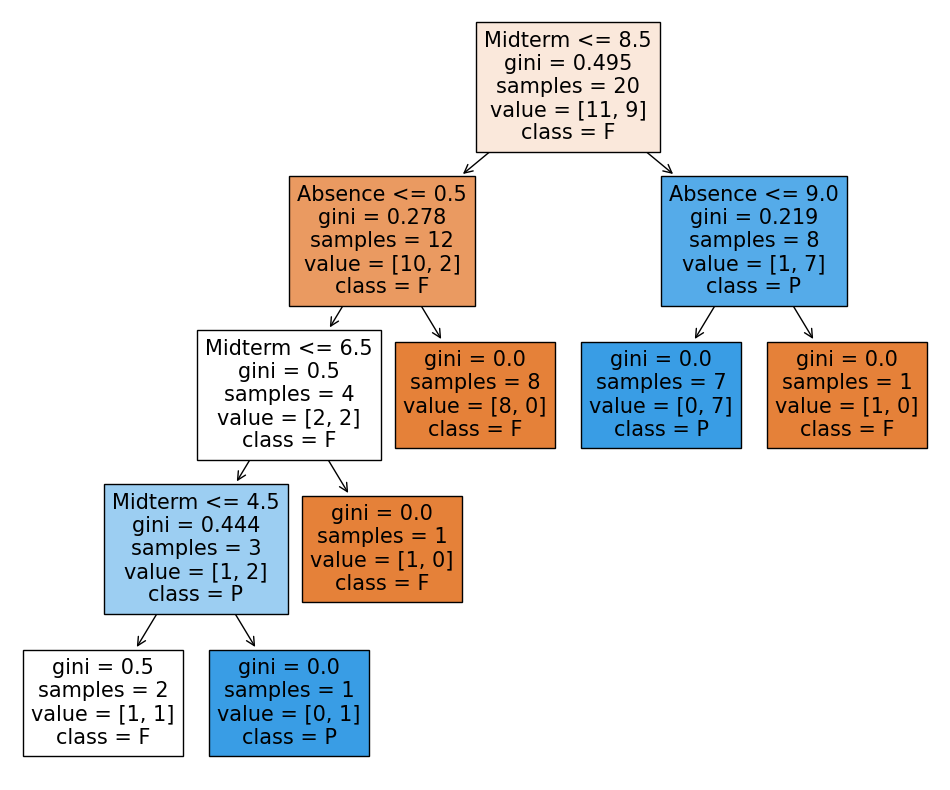

In [31]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(12, 10))
plot_tree(model, feature_names=['Midterm', 'Absence'], class_names=['F', 'P'], filled=True)
fig.show()

Actual: [1 1 1 1 1 1 0 1 1 0]
Predict: [1 1 1 1 1 1 1 1 1 0]

Confusion Matrix
 [[1 1]
 [0 8]]
Accuracy 0.9
Precision 0.8888888888888888
Recall 1.0
F1 Score 0.9411764705882353
AUC 0.75


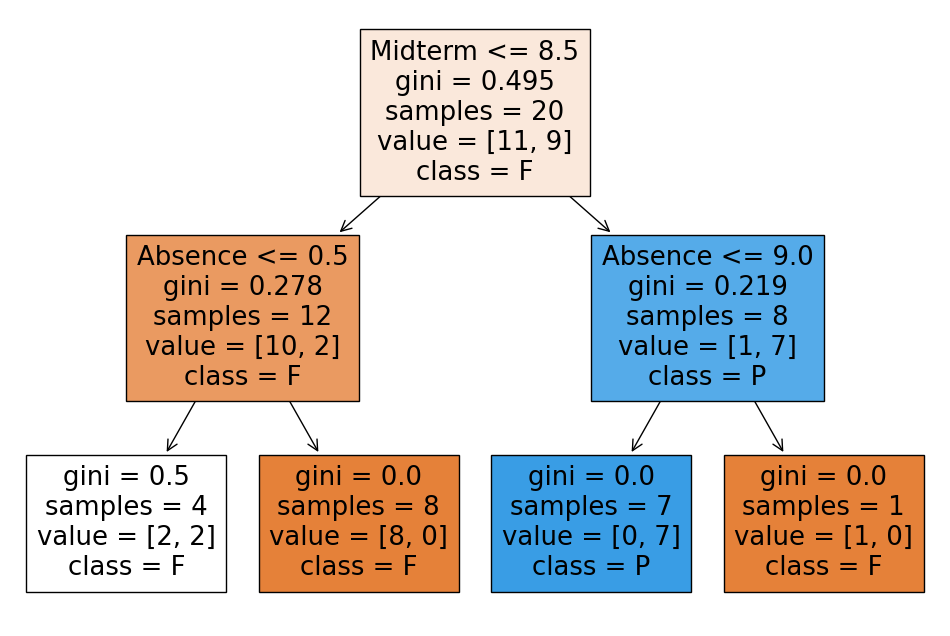

In [32]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=2)  # Hyper-parameter setting
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Actual:', y_test.values)
print('Predict:', y_pred)

print()
print("Confusion Matrix\n", confusion_matrix(y_test.values, y_pred))
print("Accuracy", accuracy_score(y_test.values, y_pred))
print("Precision", precision_score(y_test.values, y_pred))
print("Recall", recall_score(y_test.values, y_pred))
print("F1 Score", f1_score(y_test.values, y_pred))
print("AUC", roc_auc_score(y_test.values, y_pred))

fig = plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=['Midterm', 'Absence'], class_names=['F', 'P'], filled=True)
fig.show()

## Random Forest

In [33]:
df = pd.DataFrame({
    'Midterm': [None, 0, 1, 2, 2, 3, 4, 4, 4, 4, 5, 6, 8, 9, 10, 10, 11, 11, 12, 12, 13, 14, 14, 16, 17, 18, 19, 20, 20, 20],
    'Absence': [1, 8, 5, 6, 8, 2, 4, 5, None, None, None, 3, None, 1, None, 2, 2, None, None, 4, None, 1, 6, None, 1, None, None, None, 16, None],
    'Grade': ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'P', 'F', 'P', 'F', 'F', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'F', 'P', 'P', 'P', 'P', 'P', 'F', 'P'] 
})
df

,Midterm,Absence,Grade
0,NaN,1.0,F
1,0.0,8.0,F
2,1.0,5.0,F
3,2.0,6.0,F
4,2.0,8.0,F
5,3.0,2.0,F
6,4.0,4.0,F
7,4.0,5.0,F
8,4.0,NaN,P
9,4.0,NaN,F


In [34]:
# LabelEncoder and Feature Scaling (e.g., MinMaxScaler) are not required when using RandomForestClassifier
# However, LabelEncoder is required to compute precision and recall functions

df = df.fillna(0)

le = LabelEncoder()
df['Grade_encoded'] = le.fit_transform(df['Grade'])

df

,Midterm,Absence,Grade,Grade_encoded
0,0.0,1.0,F,0
1,0.0,8.0,F,0
2,1.0,5.0,F,0
3,2.0,6.0,F,0
4,2.0,8.0,F,0
5,3.0,2.0,F,0
6,4.0,4.0,F,0
7,4.0,5.0,F,0
8,4.0,0.0,P,1
9,4.0,0.0,F,0


In [35]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

print(cross_val_score(model, df[['Midterm', 'Absence']], df['Grade_encoded'], cv=4))

[0.625      0.875      0.71428571 0.57142857]


In [36]:
X_train, X_test, y_train, y_test = train_test_split(df[['Midterm', 'Absence']], df['Grade_encoded'], test_size=0.33, random_state=2024) 

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Actual:', y_test.values)
print('Predict:', y_pred)

print()
print("Confusion Matrix\n", confusion_matrix(y_test.values, y_pred))
print("Accuracy", accuracy_score(y_test.values, y_pred))
print("Precision", precision_score(y_test.values, y_pred))
print("Recall", recall_score(y_test.values, y_pred))
print("F1 Score", f1_score(y_test.values, y_pred))
print("AUC", roc_auc_score(y_test.values, y_pred))

Actual: [1 1 1 1 1 1 0 1 1 0]
Predict: [1 1 1 1 1 1 0 1 1 0]

Confusion Matrix
 [[2 0]
 [0 8]]
Accuracy 1.0
Precision 1.0
Recall 1.0
F1 Score 1.0
AUC 1.0


## SVM

### SVM with default parameters

In [37]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Actual:', y_test.values)
print('Predict:', y_pred)

print()
print("Confusion Matrix\n", confusion_matrix(y_test.values, y_pred))
print("Accuracy", accuracy_score(y_test.values, y_pred))
print("Precision", precision_score(y_test.values, y_pred))
print("Recall", recall_score(y_test.values, y_pred))
print("F1 Score", f1_score(y_test.values, y_pred))
print("AUC", roc_auc_score(y_test.values, y_pred))

Actual: [1 1 1 1 1 1 0 1 1 0]
Predict: [1 1 1 1 1 1 1 1 1 0]

Confusion Matrix
 [[1 1]
 [0 8]]
Accuracy 0.9
Precision 0.8888888888888888
Recall 1.0
F1 Score 0.9411764705882353
AUC 0.75


### SVM with `linear` kernel

In [38]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Actual:', y_test.values)
print('Predict:', y_pred)

print()
print("Confusion Matrix\n", confusion_matrix(y_test.values, y_pred))
print("Accuracy", accuracy_score(y_test.values, y_pred))
print("Precision", precision_score(y_test.values, y_pred))
print("Recall", recall_score(y_test.values, y_pred))
print("F1 Score", f1_score(y_test.values, y_pred))
print("AUC", roc_auc_score(y_test.values, y_pred))

Actual: [1 1 1 1 1 1 0 1 1 0]
Predict: [1 1 1 1 1 1 0 1 1 0]

Confusion Matrix
 [[2 0]
 [0 8]]
Accuracy 1.0
Precision 1.0
Recall 1.0
F1 Score 1.0
AUC 1.0


## K-Nearest Neighbors (KNN)

### KNN with default parameters

In [39]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Actual:', y_test.values)
print('Predict:', y_pred)

print()
print("Confusion Matrix\n", confusion_matrix(y_test.values, y_pred))
print("Accuracy", accuracy_score(y_test.values, y_pred))
print("Precision", precision_score(y_test.values, y_pred))
print("Recall", recall_score(y_test.values, y_pred))
print("F1 Score", f1_score(y_test.values, y_pred))
print("AUC", roc_auc_score(y_test.values, y_pred))

Actual: [1 1 1 1 1 1 0 1 1 0]
Predict: [1 1 1 1 1 1 1 1 1 0]

Confusion Matrix
 [[1 1]
 [0 8]]
Accuracy 0.9
Precision 0.8888888888888888
Recall 1.0
F1 Score 0.9411764705882353
AUC 0.75


### KNN with `n_neighbors=2`

In [40]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Actual:', y_test.values)
print('Predict:', y_pred)

print()
print("Confusion Matrix\n", confusion_matrix(y_test.values, y_pred))
print("Accuracy", accuracy_score(y_test.values, y_pred))
print("Precision", precision_score(y_test.values, y_pred))
print("Recall", recall_score(y_test.values, y_pred))
print("F1 Score", f1_score(y_test.values, y_pred))
print("AUC", roc_auc_score(y_test.values, y_pred))

Actual: [1 1 1 1 1 1 0 1 1 0]
Predict: [1 1 1 1 1 1 1 0 1 0]

Confusion Matrix
 [[1 1]
 [1 7]]
Accuracy 0.8
Precision 0.875
Recall 0.875
F1 Score 0.875
AUC 0.6875
